# Programmieraufgaben zur 4. Sonderübung

## Aufgabe 2.a)

### Höhenlinienplots der Zielfunktionen (3 Punkte)

Plotten sie mit `plt.contour` die in der Liste `levels` vorgegebenen Höhenlinien der beiden Funktionen im Bereich $[-1.6,1.6]\times [-1.6,1.6]$.

In [37]:
import numpy as np

In [38]:
levels = np.hstack((np.arange(-1.5,1,1),np.arange(2,36,4))) # Diese Höhenlinien sollen im Plot zu sehen sein

In [39]:
levels

array([-1.5, -0.5,  0.5,  2. ,  6. , 10. , 14. , 18. , 22. , 26. , 30. ,
       34. ])

Plot zur $l1$-Straftermfunktion

In [40]:
import matplotlib.pyplot as plt


In [41]:
def P1(x, y):
  return x + y + 10 * np.abs(x**2 + y**2 - 2)

In [42]:
x = np.linspace(-1.6, 1.6, 400)
y = np.linspace(-1.6, 1.6, 400)
X, Y = np.meshgrid(x, y)


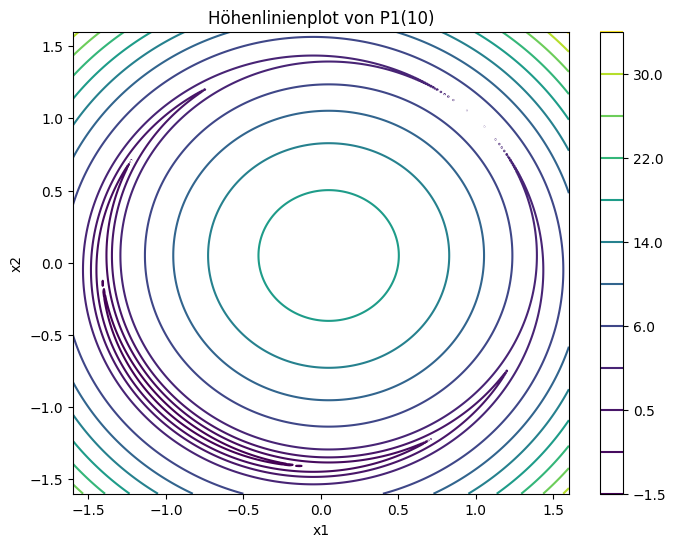

In [43]:
Z1 = P1(X, Y)
plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z1, levels=levels)
plt.title('Höhenlinienplot von P1(10)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar()
plt.show()

Plot zur $l2$-Straftermfunktion

In [44]:
def P2(x, y):
  return x + y + 10 * (x**2 + y**2 - 2)**2

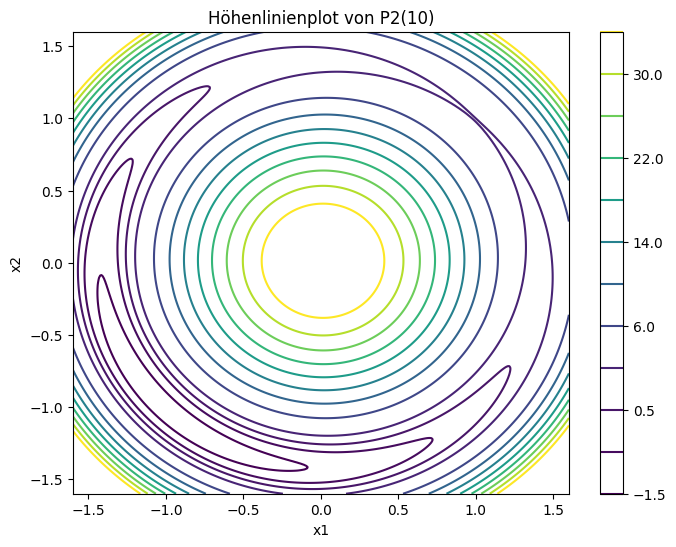

In [45]:
Z2 = P2(X, Y)
plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z2, levels=levels)
plt.title('Höhenlinienplot von P2(10)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar()
plt.show()

### Interpretation (3 Punkte)
Erläutern Sie die Abbildungen: An welchen Stellen vermuten Sie kritische Punkte der Zielfunktionen und welche Art kritischer Punkt? Nennen Sie wichtige Unterschiede zwischen den Zielfunktionen:

<i>Antworten Sie hier</i>

Beginnend bei x:=(0,0)^T, was den höchsten Punkt darstellt, nehmen die Funktionswerte ab und wieder zu. Zu interpretieren sind die Höhenlinien wie folgt: Die hellfarbigen stellen die größten Werte dar und die dunkelfarbigen die niedrigsten Werte. Somit wird deutlich, dass die Werte von großen zu niedrigen (kritischen Stellen) und dann wieder zu großen Werten wandern und dort konvegieren.

## Aufgabe 2.b)
### Das Straftermverfahren (6 Punkte)
Die folgende Funktion führt das Straftermverfahren aus, so wie es in Algorithmus 1 des Abgabeblattes beschrieben ist. Bitte beachten Sie die folgenden Hinweise:
- Durch das Update von $t^k$ ändert sich in jeder Iteration die zu minimierende Funktion und deren Gradient. Verwenden Sie lambda-Funktionen (siehe Einführungsskript), um diese Anpassungen innerhalb der while-Schleife vorzunehmen.
- Nach der Funktionsdefinition kann ein Solver-Aufruf für die unrestringierte Minimierung erfolgen. Hierfür können Sie ein selbst implementiertes Verfahren aus den Sonderübungen zu NLO 1 verwenden oder die Funktion `minimize` aus dem Paket `scipy.optimize`.

In [46]:
from scipy.optimize import minimize

In [47]:
import numpy as np
import time


In [50]:
def l2_penalty_method(f, f_grad, alpha, alpha_grad, x_0, t_0, rho, eps):
    x_k = x_0
    t_k = t_0
    k = 0

    start_time = time.time()
    while True:
        k += 1
        t_k = rho * t_k

        # Definieren der Zielfunktion mit Strafterm
        def P2(x):
            return f(x) + t_k * alpha(x)

        # Definieren Gradienten der Zielfunktion und des Strafterms
        def P2_grad(x):
            return f_grad(x) + t_k * alpha_grad(x)

        # Minimierung der Zielfunktion
        result = minimize(P2, x_k, jac=P2_grad, method='L-BFGS-B')
        x_k = result.x

        # Ob tk * ||α(x_k)|| < ε gilt
        if t_k * np.linalg.norm(alpha(x_k)) < eps:
            break

    runtime = time.time() - start_time
    f_crit = f(x_k)

    return x_k, f_crit, k, runtime


Starten Sie nun das Straftermverfahren für die zuvor generierten Startpunkte. Geben Sie für jeden Durchgang den approximierten Punkt, den Zielfunktionswert, die Anzahl an Iterationen im Straftermverfahren und die Laufzeit aus.

In [51]:
startingPoints = []
np.random.seed(12)
for i in range(5):
    startingPoints.append((np.random.rand(2)-0.5)*4)

# Parameter
t_0 = 1
rho = 10
eps = 10**(-5)



# Funktionen
# Zielfunktion
def f(x):
    return x[0] + x[1]

# Berechnen Gradienten der Zielfunktion
def f_grad(x):
    return np.array([1, 1])

# Defineren l2-Strafterm
def alpha(x):
    return (x[0]**2 + x[1]**2 - 2)**2

# Berechnen Gradienten des l2-Strafterms
def alpha_grad(x):
    return np.array([
        4*x[0]*(x[0]**2 + x[1]**2 - 2),
        4*x[1]*(x[0]**2 + x[1]**2 - 2)
    ])



# Aufruf der Methode
results = []
for i, x_0 in enumerate(startingPoints):
    x_crit, f_crit, k, runtime = l2_penalty_method(f, f_grad, alpha, alpha_grad, x_0, t_0, rho, eps)
    results.append((i, x_0, x_crit, f_crit, k, runtime))


# Ausgabe der Werte
for result in results:
    i, x_0, x_crit, f_crit, k, runtime = result
    print(f'Starting Point {i+1}: {x_0}')
    print(f'Optimale Lösung: {x_crit}')
    print(f'Optimaler Wert: {f_crit}')
    print(f'Anzahl der Iterationen: {k}')
    print(f'Runtime: {runtime} seconds\n')


Starting Point 1: [-1.38334863  0.96019879]
Optimale Lösung: [-1.00000711 -1.00000539]
Optimaler Wert: -2.0000124998820974
Anzahl der Iterationen: 4
Runtime: 0.007058382034301758 seconds

Starting Point 2: [-0.94673994  0.13495757]
Optimale Lösung: [-1.00000483 -1.00000767]
Optimaler Wert: -2.0000124998808286
Anzahl der Iterationen: 4
Runtime: 0.006894826889038086 seconds

Starting Point 3: [-1.94170015  1.67498803]
Optimale Lösung: [-1.00000696 -1.00000554]
Optimaler Wert: -2.00001249988233
Anzahl der Iterationen: 4
Runtime: 0.00634455680847168 seconds

Starting Point 4: [ 1.60285942 -1.86631429]
Optimale Lösung: [-1.00000633 -1.00000617]
Optimaler Wert: -2.000012499882825
Anzahl der Iterationen: 4
Runtime: 0.005660057067871094 seconds

Starting Point 5: [ 1.82779735 -1.45116271]
Optimale Lösung: [-1.00000624 -1.00000626]
Optimaler Wert: -2.000012499882831
Anzahl der Iterationen: 4
Runtime: 0.006964206695556641 seconds

